<a href="https://colab.research.google.com/github/areebah-nadeem/AREEBAH_NADEEM__SECTION407_Lab3/blob/main/AreebahNadeem_COMP377Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AREEBAH NADEEM COMP377 LAB 1**

Exercise 1: Linear Regression

Write an application to validate the real estate using the real estate valuation dataset from UCI repository: https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set.

Allow the user to enter the values of attribute for a new real estate. Evaluate the accuracy of the model.


In [33]:
!pip install ucimlrepo

In [34]:
!pip install ucimlrepo scikit-learn pandas numpy matplotlib

                                     name     role        type demographic  \
0                                      No       ID     Integer        None   
1                     X1 transaction date  Feature  Continuous        None   
2                            X2 house age  Feature  Continuous        None   
3  X3 distance to the nearest MRT station  Feature  Continuous        None   
4         X4 number of convenience stores  Feature     Integer        None   
5                             X5 latitude  Feature  Continuous        None   
6                            X6 longitude  Feature  Continuous        None   
7              Y house price of unit area   Target  Continuous        None   

                                         description  \
0                                               None   
1  for example, 2013.250=2013 March, 2013.500=201...   
2                                               None   
3                                               None   
4  number of conv

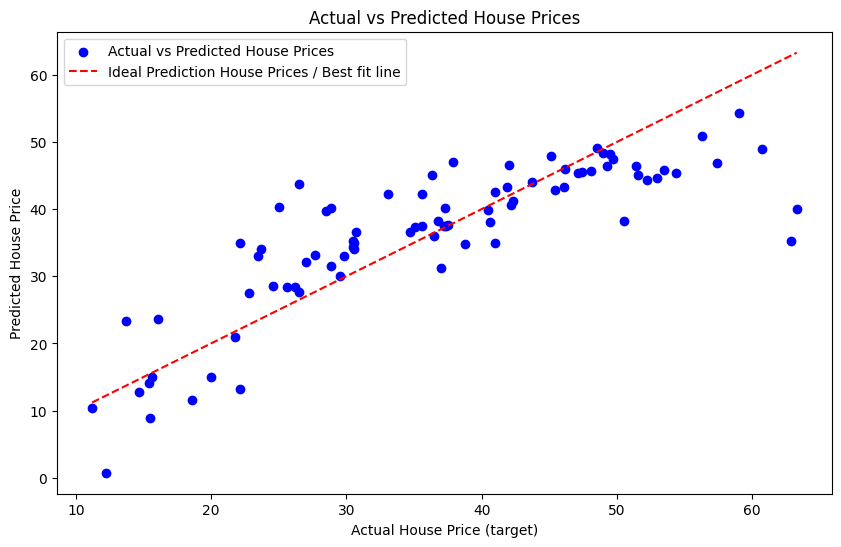


Enter details for a new real estate property:
Waiting for input: X1 transaction date
X1 transaction date: 2012.917
Waiting for input: X2 house age
X2 house age: 14.7
Waiting for input: X3 distance to the nearest MRT station
X3 distance to the nearest MRT station: 1935.009
Waiting for input: X4 number of convenience stores
X4 number of convenience stores: 2
Waiting for input: X5 latitude
X5 latitude: 24.96386
Waiting for input: X6 longitude
X6 longitude: 121.51458

New House Predicted Price: 30.54301343534098


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
# Import necessary libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler







#STEP1 : LOADING DATA FROM SORCE AND PUTTING IN DATA FRAME
# Loading the dataset from UCI repository by using import python
real_estate_valuation = fetch_ucirepo(id=477)
X_features = real_estate_valuation.data.features
y_target = real_estate_valuation.data.targets


# INFORMATION ABOUT DATASET
# Display dataset information to see what are features and target
# print(real_estate_valuation.variables)

#Checking the data

# Display the first 5 rows of the dataset
print("\nFirst 5 rows of features (X):")
print(X_features.head())

# Display the first 5 target values (y)
print("\nFirst 5 target values (y):")
print(y_target[:5])



# Convert to pandas DataFrame as data is not in usable state
X_features_df = pd.DataFrame(X_features)
y_target_df = pd.DataFrame(y_target)

#Checking the data



print(f"Minimum House Price: {y_target_df.min().values[0]}")
print(f"Maximum House Price: {y_target_df.max().values[0]}")



#STEP 2: SPLIT DATA TRAINING AND TEST
# Split the data into training and testing sets so that I can train my data with 80 :20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X_features_df ,
    y_target_df,
    test_size=0.2,
    random_state=42
)


# STEP 3 : MAKING A REGREASSION MODEL AND TRAINING IT

# Training my data based on the linear regression model as it was assignment requirement
#Moreover i use modle.fit to make a closes best fit line
model = LinearRegression()
model.fit(X_train, y_train)


# STEP 4: EVALUATE THE MODEL

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Printing Evaluate the model results

print(f"\n\n\n\nMean Squared Error Value: {mse}")
print(f"R-squared Value( close to 1 better): {r2}")


# STEP 5 : SHOWING VISUAL RESULTS
#=====================Plotting Scatterplot

# Ploting to see visualization: Actual vs Predicted House Prices
plt.figure(figsize=(10, 6))

plt.scatter(y_test,
            y_pred,
            color='blue',
            label='Actual vs Predicted House Prices')

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red',
         linestyle='--',
         label='Ideal Prediction House Prices / Best fit line')

plt.xlabel('Actual House Price (target)')
plt.ylabel('Predicted House Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()


# STEP 6: USER INPUT SECTION ( ASSIGNMENT REQUIREMENT)


#=================Getting user input for prediction

# Getting user input for prediction
print("\nEnter details for a new real estate property:")
new_property_X_features = []
for feature in X_features_df.columns:
    print(f"Waiting for input: {feature}")  # Debugging line
    values = float(input(f"{feature}: "))
    new_property_X_features.append(values)

# Reshape input and predict
new_property_X_features = np.array(new_property_X_features).reshape(1, -1)
new_house_predicted_price = model.predict(new_property_X_features)
new_house_predicted_price = max(0, new_house_predicted_price[0][0])  # Ensure non-negative
print(f"\nNew House Predicted Price: {new_house_predicted_price}")


In [36]:
#EXERCISE 2


Exercise 2: Polynomial Regression

Write an application to compute the house price using a polynomial regression model. The dataset is from California housing data: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html.

Allow the user to enter the values of attribute for a new real estate. Evaluate the accuracy of the model.



First 5 rows of features (X):
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

First 5 target values (y):
[4.526 3.585 3.521 3.413 3.422]
Mean Squared Error: 0.4643015261571134
R-squared: 0.6456819711504156
Enter MedInc: 8.3252
Enter HouseAge: 41.0
Enter AveRooms: 6.984127
Enter AveBedrms: 1.023810
Enter Population: 322
Enter AveOccup: 2.555556
Enter Latitude: 37.86
Enter Longitude: -122.23


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Predicted House Price: 4.033249449951143


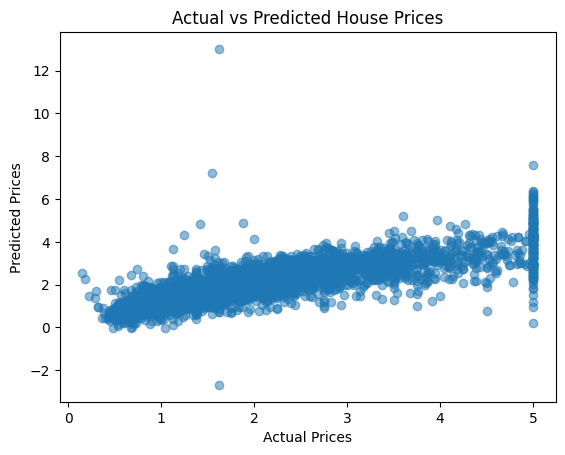

In [39]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#STEP1 : LOADING DATA FROM SORCE AND PUTTING IN DATA FRAME
california_housing = fetch_california_housing()
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = california_housing.target

#Checking the data

# Display the first 5 rows of the dataset
print("\nFirst 5 rows of features (X):")
print(X.head())

# Display the first 5 target values (y)
print("\nFirst 5 target values (y):")
print(y[:5])



#STEP 2: SPLIT DATA TRAINING AND TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Step 3: CREATING THE POLYNOMIAL FEATURES
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 4: TRAINING THE MODEL WITH LINEAR REGRESSION
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Step 5: EVALUATING THE MODEL
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# STEP 6 USER INPUT TO TEST THE MODEL
new_house = []
for feature in california_housing.feature_names:
    value = float(input(f"Enter {feature}: "))
    new_house.append(value)

new_house_poly = poly.transform([new_house])
predicted_price = model.predict(new_house_poly)
print(f"Predicted House Price: {predicted_price[0]}")

# STEP 7 PLOTING THE RESULTS
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual ")
plt.ylabel("Predicted ")
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()
